In [33]:
# Import dependencies
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
import pandas as pd
import pyspark
import pyspark.pandas as ps
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from pyspark.shell import spark

In [34]:
#Assign path to variable
alzheimer_data_path = "../data/alzheimers_disease_data.csv"

In [35]:
#Create temp view to be able to easily query from DataFrame
spark_test_df = spark.read.csv(alzheimer_data_path, header = 'True')

In [36]:
#Get the BMI for alzheimer POSITIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_positive_data = spark.sql("""SELECT BMI FROM view WHERE Diagnosis=1""")
alzheimer_positive_data.createOrReplaceTempView("alzheimer_positive")
spark.sql("SELECT * FROM alzheimer_positive").show()
plot_positive_df = alzheimer_positive_data.toPandas()

+------------------+
|               BMI|
+------------------+
|18.776009409162835|
|28.870652386039602|
| 18.04591747393549|
|22.822896244065568|
| 16.33328275322603|
|20.041400357053135|
| 36.22309879636211|
| 21.96939009200723|
|15.457688068877605|
|17.572895650191803|
|36.221033471912186|
| 33.78068523580437|
|24.852705199101358|
| 37.56853045247124|
|26.804163783794337|
|15.648055357542315|
|33.476970506688936|
| 32.03489967050928|
|15.639676831549425|
| 38.07613526117206|
+------------------+
only showing top 20 rows



In [37]:
#Get the BMI for alzheimer NEGATIVE patients into a dataframe
spark_test_df.createOrReplaceTempView('view')
alzheimer_negative_data = spark.sql("""SELECT BMI FROM view WHERE Diagnosis=0""")
alzheimer_negative_data.createOrReplaceTempView("alzheimer_negative")
spark.sql("SELECT * FROM alzheimer_negative").show()
plot_negative_df = alzheimer_negative_data.toPandas()

+------------------+
|               BMI|
+------------------+
|22.927749230993864|
| 26.82768119159602|
|17.795882442817113|
| 33.80081704413547|
|20.716973826446807|
|30.626885546270938|
|38.387621858169126|
|27.833188380332352|
| 35.45630172642629|
| 39.46303422106146|
|22.463382649410605|
|26.770945999107713|
|27.942862734988346|
| 37.93246902566973|
|37.543943165696646|
|37.583877059139006|
| 39.12367687367173|
| 34.91818382670918|
|  18.4347889493694|
| 30.95364704240386|
+------------------+
only showing top 20 rows



(array([34., 24., 29., 30., 20., 32., 31., 31., 36., 30., 21., 32., 30.,
        31., 27., 31., 18., 33., 36., 38., 25., 35., 48., 25., 33.]),
 array([15.01823993, 16.01722103, 17.01620213, 18.01518323, 19.01416434,
        20.01314544, 21.01212654, 22.01110764, 23.01008874, 24.00906984,
        25.00805094, 26.00703204, 27.00601315, 28.00499425, 29.00397535,
        30.00295645, 31.00193755, 32.00091865, 32.99989975, 33.99888086,
        34.99786196, 35.99684306, 36.99582416, 37.99480526, 38.99378636,
        39.99276746]),
 <BarContainer object of 25 artists>)

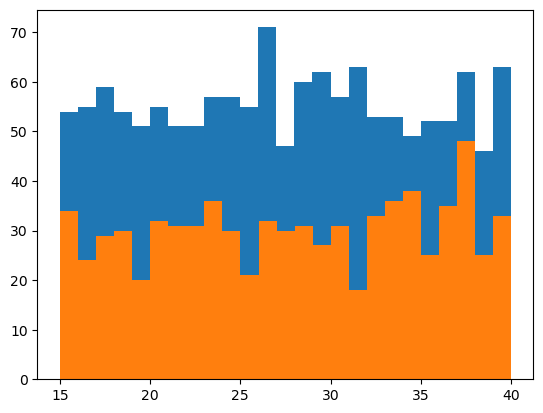

In [38]:
plot_positive_df['BMI']= plot_positive_df['BMI'].astype(float)
plot_negative_df['BMI']= plot_negative_df['BMI'].astype(float)
plt.hist(plot_negative_df, bins = 25)
plt.hist(plot_positive_df, bins = 25)
#hist = plot_positive_df.hist(bins=25) 
#hist = plot_negative_df.hist(bins =25)